In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
### vou usar isso com ref:https://www.kaggle.com/code/mehrankazeminia/ps3e17-gaussiannb

In [2]:
train = pd.read_csv("playground-series-s3e17/train.csv", )
test = pd.read_csv("playground-series-s3e17/test.csv")
df_original = pd.read_csv("original/machine failure.csv")
df_original.drop(columns='UDI', inplace= True)
train.drop(columns='id', inplace= True)

In [3]:
train.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df_original.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df = pd.concat([train,df_original])

In [6]:
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [7]:
df.isnull().sum().sum()## 0 Null values

0

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Rotational speed [rpm]'}>],
       [<Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>]], dtype=object)

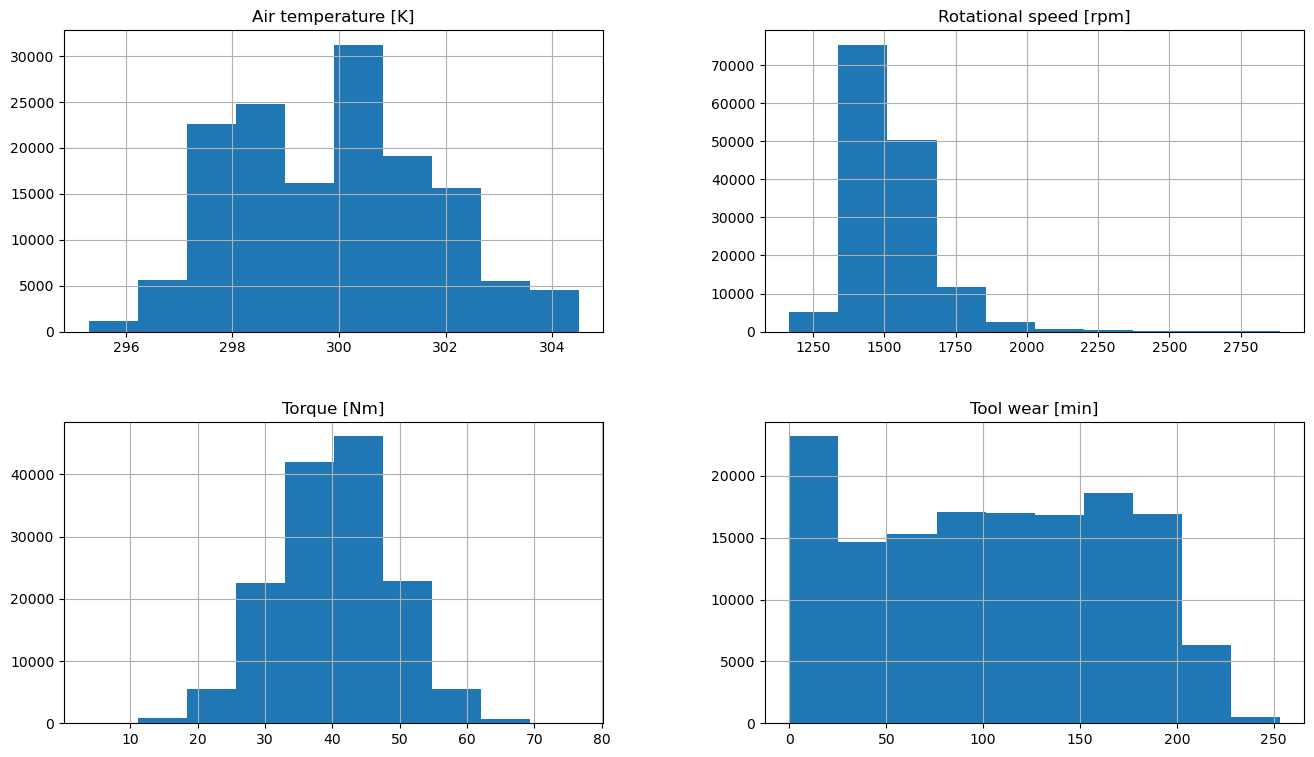

In [8]:
df[['Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]' , 'Tool wear [min]']].hist(figsize = (16,9))

<Axes: xlabel='Machine failure', ylabel='Process temperature [K]'>

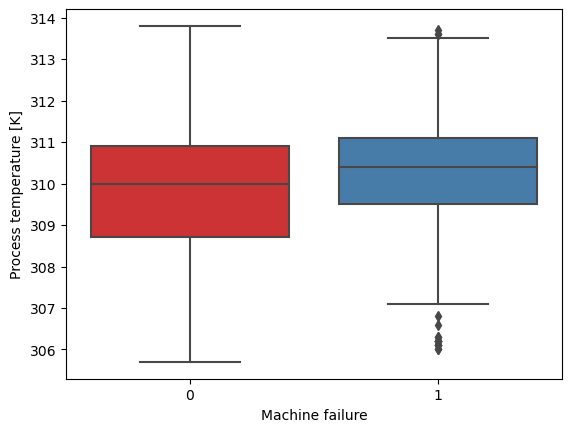

In [9]:
sns.boxplot(y = df['Process temperature [K]'], x = df['Machine failure'],palette="Set1") ##temperatura média mais alta onde ocorre machine failure

<Axes: xlabel='Machine failure', ylabel='Air temperature [K]'>

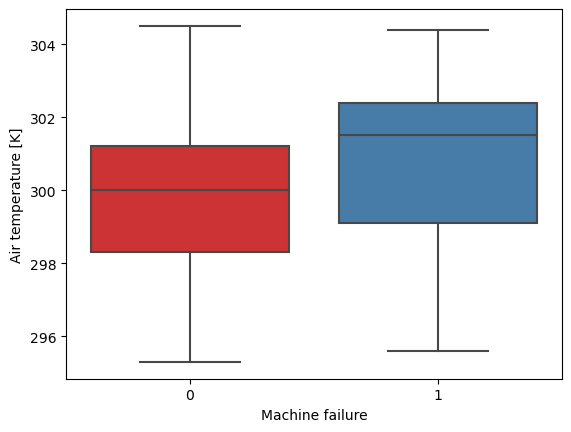

In [10]:
sns.boxplot(y = df['Air temperature [K]'], x = df['Machine failure'],palette="Set1") ##temperatura média mais alta onde ocorre machine failure

<Axes: xlabel='Machine failure', ylabel='Rotational speed [rpm]'>

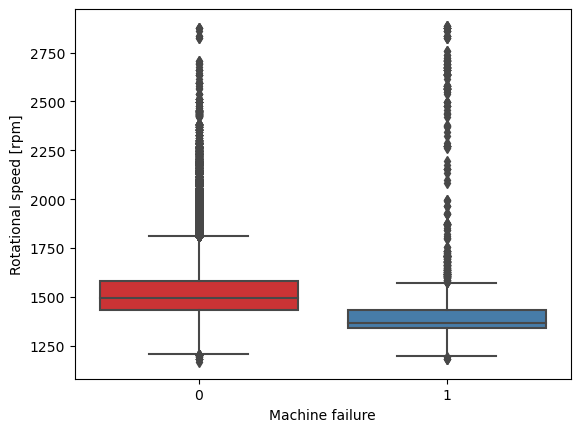

In [11]:
sns.boxplot(y = df['Rotational speed [rpm]'], x = df['Machine failure'],palette="Set1") ##velocidade média mais baixa onde ocorre machine failure

<Axes: xlabel='Machine failure', ylabel='Torque [Nm]'>

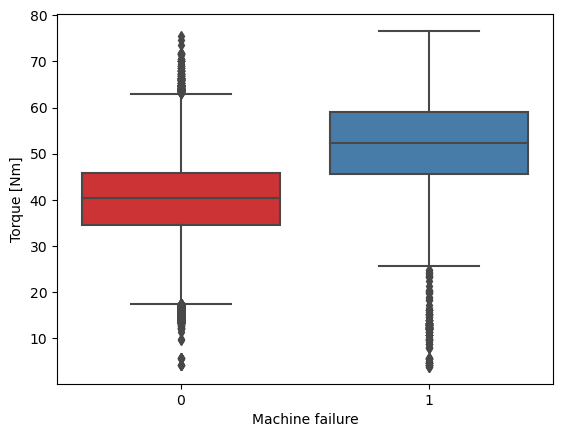

In [12]:
sns.boxplot(y = df['Torque [Nm]'], x = df['Machine failure'],palette="Set1")##torque médio mais alto onde ocorre machine failure

<Axes: xlabel='Machine failure', ylabel='Tool wear [min]'>

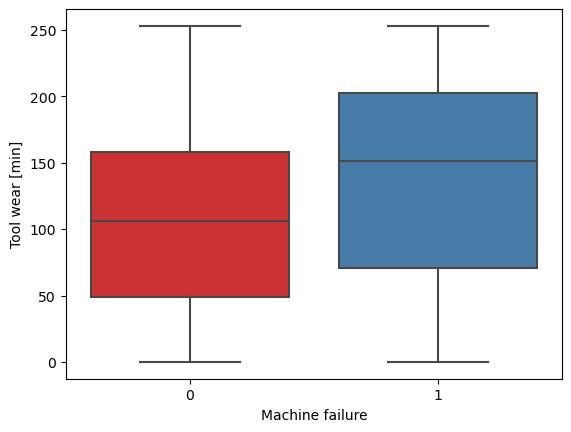

In [13]:
sns.boxplot(y = df['Tool wear [min]'], x = df['Machine failure'],palette="Set1") ##Tool Wear mais alto onde ocorre machine failure

In [14]:
df.groupby('TWF').describe()['Machine failure']['mean']###só acontece erro TWF = 1.

TWF
0    0.015249
1    1.000000
Name: mean, dtype: float64

In [15]:
df.groupby('HDF').describe()['Machine failure']['mean']###mais provavel erro HDF = 1

HDF
0    0.011496
1    0.992674
Name: mean, dtype: float64

In [16]:
df.groupby('PWF').describe()['Machine failure']['mean']###muito mais provavel erro PWF = 1

PWF
0    0.014164
1    0.992891
Name: mean, dtype: float64

In [17]:
df.groupby('OSF').describe()['Machine failure']['mean']###mais provavel erro OSF = 1

OSF
0    0.01271
1    0.99373
Name: mean, dtype: float64

In [18]:
df.groupby('RNF').describe()['Machine failure']['mean']###parece similar os valores

RNF
0    0.016974
1    0.021407
Name: mean, dtype: float64

Text(0, 0.5, 'Machine failure Mean')

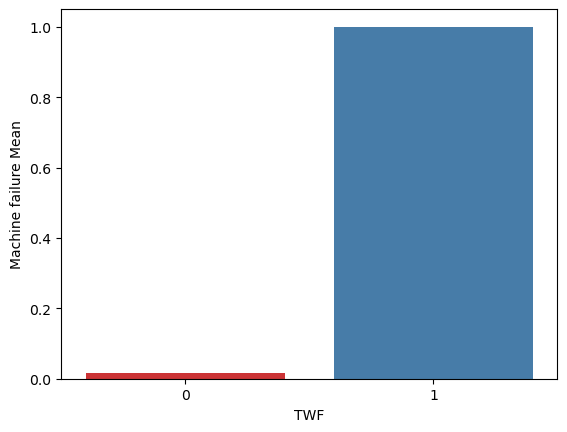

In [19]:
plotdf = df.groupby('TWF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="Set1")
plt.ylabel('Machine failure Mean') ###if twf = 1 so machine failure = 1

Text(0, 0.5, 'Machine failure Mean')

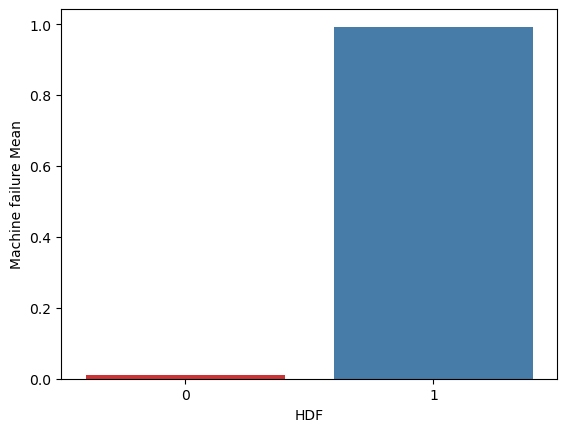

In [20]:
plotdf = df.groupby('HDF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="Set1")
plt.ylabel('Machine failure Mean') ###if HDF = 1 so machine failure = 1 , high probability*

Text(0, 0.5, 'Machine failure Mean')

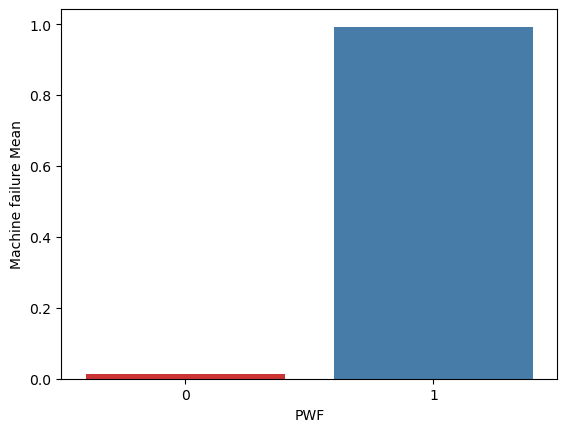

In [21]:
plotdf = df.groupby('PWF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="Set1")
plt.ylabel('Machine failure Mean') ###if PWF = 1 highly probability machine failure = 1,

Text(0, 0.5, 'Machine failure Mean')

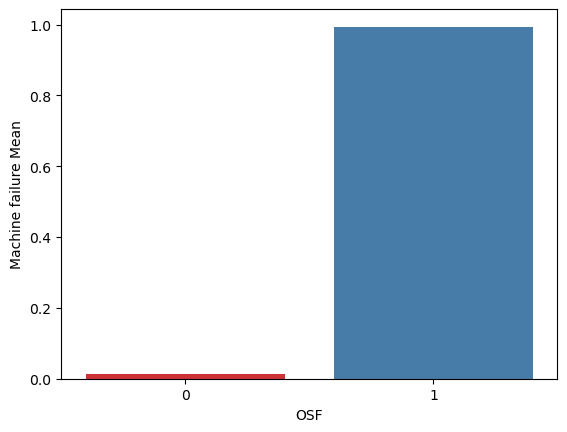

In [22]:
plotdf = df.groupby('OSF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="Set1")
plt.ylabel('Machine failure Mean',)

Text(0, 0.5, 'Machine failure Mean')

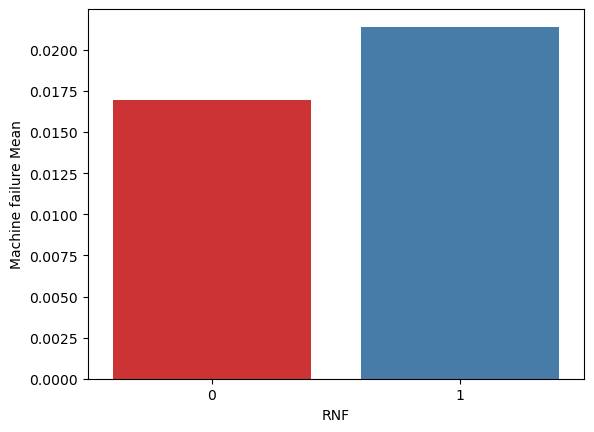

In [23]:
plotdf = df.groupby('RNF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="Set1")
plt.ylabel('Machine failure Mean')

In [24]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [25]:
machinfailure1 = df[df['Machine failure'] == 1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']]
a=machinfailure1

In [26]:
twfhdfpwfosf1 = a[(a['TWF'] == 1) | (a['HDF'] == 1) | (a['PWF'] == 1) | (a['OSF'] == 1)]

In [27]:
#len(machinfailure1), len(twfhdfpwfosf1), 
ratiotwfhdfpwfosf1erro = len(twfhdfpwfosf1)/len(machinfailure1)
ratiotwfhdfpwfosf1erro

0.792119018898271

Text(0, 0.5, 'Machine Failure Ratio')

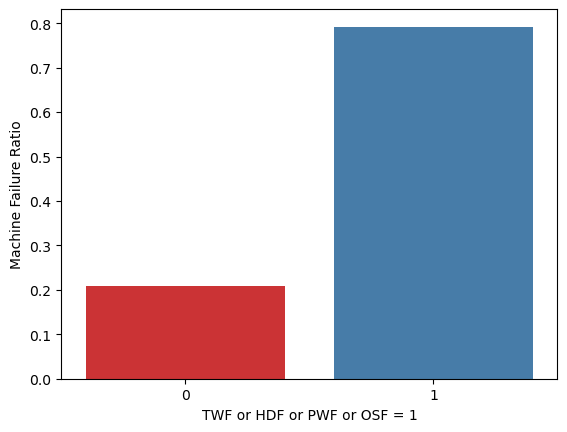

In [28]:

values = [ratiotwfhdfpwfosf1erro, 1-ratiotwfhdfpwfosf1erro]
index = [1, 0]

sns.barplot(x = index, y = values, palette="Set1")
plt.xlabel('TWF or HDF or PWF or OSF = 1')
plt.ylabel('Machine Failure Ratio')

In [29]:
values = df.groupby('Type').describe()['Machine failure']['mean']
print(f' machine failure{100*values}') ###chance de machine failure


 machine failureType
H    1.380214
L    1.805553
M    1.479416
Name: mean, dtype: float64


<Axes: xlabel='Type', ylabel='Machine failure'>

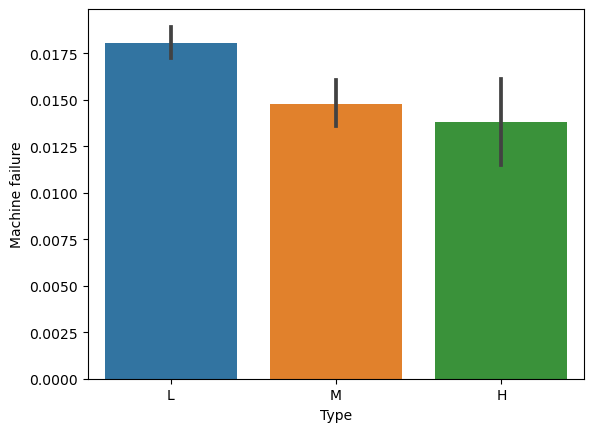

In [30]:
sns.barplot(y = df['Machine failure'] , x = df['Type']) ### Maquinas L maior chance de quebra Maquinas H menor

### Conclusão
* se TWF ou HDF ou PWF ou OSF forem 1 quase certo a chance de ocorrer erro.
79% das machine failure tem algum deles igual 1
* pode ocorrer erro se todos forem 0  ocorre em 21% dos casos
* RNF não parece ter tanta influência comparado aos outros , porém é mais provavel quando é 1
* Temperatura média mais alta onde ocorre machine failure 
* Velocidade média mais baixa onde ocorre machine failure
* Torque médio mais alto onde ocorre machine failure
* Tool Wear mais alto onde ocorre machine failure

* tipos maquinas chance de quebra maquinas L tem chance de quebra com 1.8% de chance, M 1.47%, H 1.38% chance


In [31]:
df['Product ID'].value_counts()

L53257    140
L53271    132
L49056    132
L48892    121
L54275    121
         ... 
H31308      1
L48159      1
M15753      1
M14860      1
M24818      1
Name: Product ID, Length: 10000, dtype: int64

In [32]:
machinfailure1 = df[df['Machine failure'] == 1]
dferro = machinfailure1['Product ID'].value_counts() ##ID das maquinas que ocorreram erro
values = machinfailure1['Product ID'].values 
dftotal = df[df['Product ID'].isin(values)]['Product ID'].value_counts() ###criar um dataframe apenas com as que tem o
#ID das maquinas com erros

In [33]:
dftotal = dftotal.to_frame()

In [34]:
dferro = dferro.to_frame()

In [35]:
dftotalerro = pd.merge(dftotal, dferro, left_index=True, right_index=True)

In [36]:
dftotalerro['ratio'] = dftotalerro['Product ID_y']/dftotalerro['Product ID_x']

In [37]:
dftotalerro10pls = dftotalerro[dftotalerro['Product ID_x'] > 9] ###+de 10 ou = valores erro

In [38]:
dftotalerro10pls

,Product ID_x,Product ID_y,ratio
L53257,140,4,0.028571
L53271,132,6,0.045455
L54275,121,2,0.016529
L53258,118,20,0.169492
L54255,109,1,0.009174
...,...,...,...
L51759,10,4,0.400000
L51790,10,1,0.100000
L51054,10,1,0.100000
L55372,10,1,0.100000


In [39]:
dftotalerro10plsratio01 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.1] 
###valores com chance de erro >= ou 0.1 alta chance de erro e com + de 10 valores

In [40]:
dftotalerro10plsratio01['Product ID_y'].sum() ###mais da metade dos erro

1211

In [41]:
print(f" maquinas com 10% ou mais chance de problemas causam {100*round(dftotalerro10plsratio01['Product ID_y'].sum()/df['Machine failure'].sum(),3)}% dos casos")


 maquinas com 10% ou mais chance de problemas causam 48.699999999999996% dos casos


### Novas Colunas 

In [42]:
###criar uma coluna com os esses separando essas maquinas com problemas mais frequentes

dftotalerro10plsratio01 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.1] 
df['totalerro10plsratio01'] = df['Product ID'].isin(dftotalerro10plsratio01.index).astype(int) #10%
test['totalerro10plsratio01'] = test['Product ID'].isin(dftotalerro10plsratio01.index).astype(int) #10%


dftotalerro10plsratio02 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.2] 
df['totalerro10plsratio02'] = df['Product ID'].isin(dftotalerro10plsratio02.index).astype(int) #20%
test['totalerro10plsratio02'] = test['Product ID'].isin(dftotalerro10plsratio02.index).astype(int) #20%

dftotalerro10plsratio03 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.3] 
df['totalerro10plsratio03'] = df['Product ID'].isin(dftotalerro10plsratio03.index).astype(int) #30
test['totalerro10plsratio03'] = test['Product ID'].isin(dftotalerro10plsratio03.index).astype(int) #30

dftotalerro10plsratio04 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.4] 
df['totalerro10plsratio04'] = df['Product ID'].isin(dftotalerro10plsratio04.index).astype(int) #40
test['totalerro10plsratio04'] = test['Product ID'].isin(dftotalerro10plsratio04.index).astype(int) #40

dftotalerro10plsratio05 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.5] 
df['totalerro10plsratio05'] = df['Product ID'].isin(dftotalerro10plsratio05.index).astype(int) #50
test['totalerro10plsratio05'] = test['Product ID'].isin(dftotalerro10plsratio05.index).astype(int) #50

dftotalerro10plsratio06 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.6] 
df['totalerro10plsratio06'] = df['Product ID'].isin(dftotalerro10plsratio06.index).astype(int) #60
test['totalerro10plsratio06'] = test['Product ID'].isin(dftotalerro10plsratio06.index).astype(int) #60
##não tem acima de 0.7

Typemap = {'L' : 0 , 'M' : 1, 'H' : 2}
df['Type'] = df['Type'].map(Typemap)
test['Type'] = test['Type'].map(Typemap)

In [43]:
matrix = df.corr()
abs(matrix['Machine failure'].sort_values(ascending = False))

C:\Users\vitor\AppData\Local\Temp\ipykernel_16132\3849833344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


Machine failure            1.000000
HDF                        0.566309
OSF                        0.500060
PWF                        0.406044
TWF                        0.319621
totalerro10plsratio01      0.301261
totalerro10plsratio02      0.290215
totalerro10plsratio03      0.247147
totalerro10plsratio04      0.195357
totalerro10plsratio05      0.156436
Torque [Nm]                0.150027
totalerro10plsratio06      0.112434
Air temperature [K]        0.069595
Tool wear [min]            0.061215
Process temperature [K]    0.031734
RNF                        0.001619
Type                       0.012176
Rotational speed [rpm]     0.057575
Name: Machine failure, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Machine failure', 'Product ID'])
y = df['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predict) ##boa precisao?

0.9956541533876909

In [53]:
predicttest = model.predict(test.drop(columns=['Product ID', 'id' ]))
test['Machine failure'] = predicttest
sample_submission = test[['id','Machine failure']]
sample_submission.set_index('id', inplace=True)
sample_submission.to_csv("Comtodosdadostest1.csv") ##meu resultado foi de 91% no kaggle foi bom mas pode ser melhor*
test.drop(columns='Machine failure', inplace = True)

### Vou balancear os dados modelo 2

In [46]:
#machinefailure1 = df[df['Machine failure'] == 1]
#machinefailure0 = df[df['Machine failure'] == 0]

In [47]:
#machinefailure1.sample(600) ##return random df
#machinefailure0.sample(600) ##return random df

In [48]:
#newdf = pd.concat([machinefailure1, machinefailure0])

In [49]:
#newdf.head(5)

In [50]:
#from sklearn.ensemble import GradientBoostingClassifier

In [51]:
#X = newdf.drop(columns=['Machine failure', 'Product ID', 'id' ])
#y = newdf['Machine failure']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#model = GradientBoostingClassifier()

#model.fit(X_train,y_train)
#predict = model.predict(X_test)



#accuracy_score(y_test, predict)

In [52]:
### submission
#xtest = test.drop(columns=['Product ID', 'id' ])
#predicttest = model.predict(xtest)
#test['Machine failure'] = predicttest

#sample_submission = test[['id','Machine failure']]
#sample_submission.set_index('id', inplace=True)
#sample_submission.to_csv("balanceadograndboost.csv")


#test.drop(columns='Machine failure', inplace = True)

##não mudou muito